# Phishing website detector model training.
Phishing is one of the major problems faced by cyber-world and leads to financial losses for both industries and individuals.
Detection of phishing attack with high accuracy has always been a challenging issue. One of the effective way of checking
if a website/url is legitimate, or a scam is by checking its url.

The UCI Machine learning Repository has such a dataset which consists of features based on the urls.
The dataset I will be using is the [Phishing Websites](https://archive.ics.uci.edu/ml/datasets/Phishing+Websites) dataset from the
UCI Machine learning Repository.

In [31]:
# Importing necessary libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
# importing the dataset into a pandas dataframe
DATA_DIR = 'dataset/csv_result-Training Dataset.csv'

phishing_df = pd.read_csv(DATA_DIR)
phishing_df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [33]:
# looking at all the attributes of the dataset
phishing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [34]:
# creating a list of attributes that will be used for training
final_df_columns = [
    "having_IP_Address",
    "URL_Length",
    "Shortining_Service",
    "having_At_Symbol",
    "double_slash_redirecting",
    "Prefix_Suffix",
    "having_Sub_Domain",
    "SSLfinal_State",
    "Domain_registeration_length",
    "HTTPS_token",
    "URL_of_Anchor",
    "Links_in_tags",
    "Abnormal_URL",
    "Redirect",
    "RightClick",
    "Iframe",
    "age_of_domain",
    "DNSRecord",
    "web_traffic",
    "Statistical_report",
    "Result"
]

In [35]:
# discarding attributes which will not be used for training
mod_df = phishing_df[phishing_df.columns.intersection(final_df_columns)]
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   HTTPS_token                  11055 non-null  int64
 10  URL_of_Anchor                11055 non-null  int64
 11  Links_in_tags                11055 non-null  int64
 12  Abnormal_URL                 11055 non-null  int64
 13  Redirect                     11055 non-null  i

In [36]:
# Function to plot bar graph
def plot_bar_graph(title,xlabel,ylabel,X,y,colors,figsize,width):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.bar(X,y,color=colors,width=width)
    plt.show()

In [37]:
# value counts in "Result"
mod_df["Result"].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

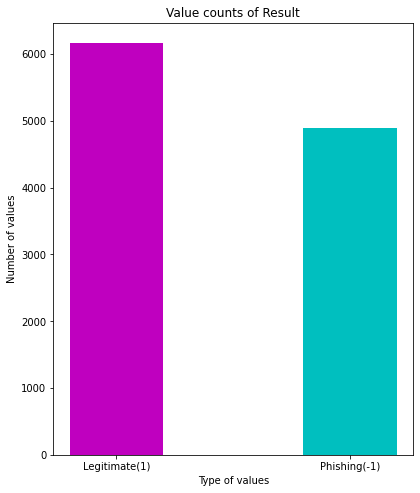

In [38]:
result_labels = ["Legitimate(1)", "Phishing(-1)"]
results = phishing_df.Result.value_counts()
my_colors = ['m', 'c']

# plotting how many instances of legitimate(1) and Phishing(-1) we have.
plot_bar_graph(title="Value counts of Result", xlabel="Type of values", ylabel="Number of values", X=result_labels,y=results,colors=my_colors,figsize=(5,6),width=0.4)

In [39]:
# creating the train and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mod_df, test_size=0.2, random_state=42)

In [40]:
# creating the X and y for training
# X are the attributes to be trained on
# y is the result to be predicted

X_train = train_set.drop("Result", axis=1)
y_train = train_set["Result"].copy()

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8844 entries, 480 to 7270
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            8844 non-null   int64
 1   URL_Length                   8844 non-null   int64
 2   Shortining_Service           8844 non-null   int64
 3   having_At_Symbol             8844 non-null   int64
 4   double_slash_redirecting     8844 non-null   int64
 5   Prefix_Suffix                8844 non-null   int64
 6   having_Sub_Domain            8844 non-null   int64
 7   SSLfinal_State               8844 non-null   int64
 8   Domain_registeration_length  8844 non-null   int64
 9   HTTPS_token                  8844 non-null   int64
 10  URL_of_Anchor                8844 non-null   int64
 11  Links_in_tags                8844 non-null   int64
 12  Abnormal_URL                 8844 non-null   int64
 13  Redirect                     8844 non-null   i

In [41]:
# importing the models which need to be tested which will help to find which one performs best for this dataset.
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_predict

# list of all the classifier models which will be used for training
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
]

# list of all the names of the models
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

models = zip(classifiers,names)

def get_model_scores(model,name,X,y):

    """
    Function that calculates scores of the model.

    :param model: model for which the scores need to be generated
    :param name: name of the model
    :param X: attributes the model should be evaluated on
    :param y: result of the attributes which need to be predicted
    :return: scores of the model
    """

    # predictions on the train set using cross validation
    y_train_pred = cross_val_predict(model, X, y, cv=10)

    # calculating precision
    precision = precision_score(y, y_train_pred)
    # calculating recall
    recall = recall_score(y, y_train_pred)
    # calculating f1 score
    f1 = f1_score(y,y_train_pred)
    # calculating roc_Auc_score
    roc_auc = roc_auc_score(y, y_train_pred)
    # calculating accuracy of the model
    accuracy = model.score(X,y)

    return {
        "model_name": name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc_score": roc_auc,

    }

def train_model_for_scores(model,name,X,y):

    """
    Function that trains and then returns the scores of the model
    :param model: model for which the scores need to be generated
    :param name: name of the model
    :param X: attributes the model should be evaluated on
    :param y: result of the attributes which need to be predicted
    :return: returns scores of model after training
    """

    model.fit(X,y)
    score = get_model_scores(model,name,X,y)
    return score

all_model_scores = []

# training the models and getting all their scores for comparison
for model,name in models:

    model_score = train_model_for_scores(model,name,X_train,y_train)
    all_model_scores.append(model_score)


In [42]:
# converting model scores to DataFrame for easy readability
model_df = pd.DataFrame(all_model_scores)
model_df

,model_name,accuracy,precision,recall,f1,roc_auc_score
0,Nearest Neighbors,0.961895,0.939822,0.949408,0.944591,0.936906
1,Linear SVM,0.915875,0.905896,0.946552,0.925778,0.912140
2,RBF SVM,0.975237,0.919984,0.938188,0.928997,0.918359
3,Decision Tree,0.920511,0.903213,0.963280,0.932280,0.917460
4,Random Forest,0.907960,0.860264,0.955732,0.905489,0.881342
5,Neural Net,0.931479,0.926824,0.950836,0.938677,0.928741
6,AdaBoost,0.929331,0.921662,0.950428,0.935824,0.924986


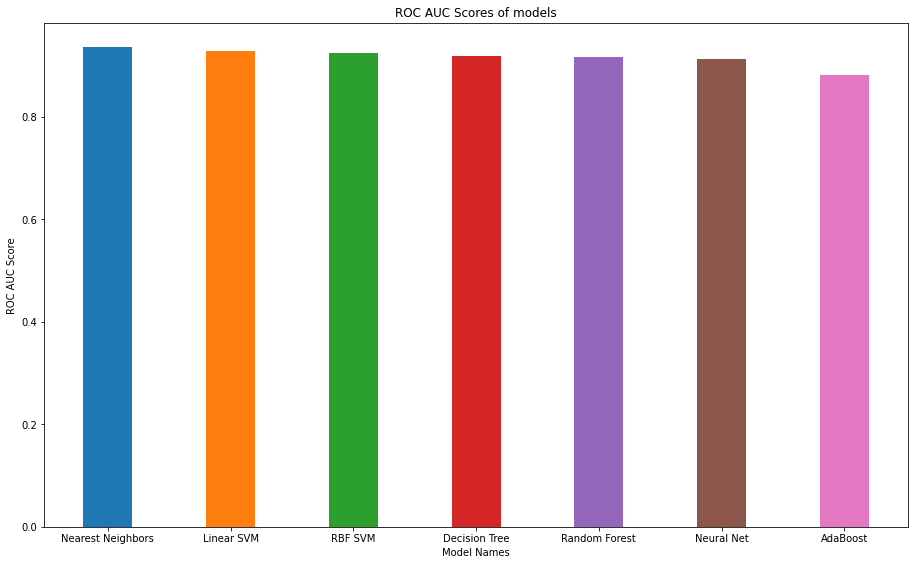

In [43]:
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

# plotting models according to their ROC AUC Scores
plot_bar_graph(title="ROC AUC Scores of models", xlabel="Model Names", ylabel="ROC AUC Score", X=model_df["model_name"], y=model_df["roc_auc_score"].sort_values(ascending=False), colors=colors,figsize=(12,7), width=0.4)

# Results:
From the different models trained above we can see that all of them give similar results based on the f1 score and roc_auc score
roc_auc score, but the KNeighborsClassifier performed the best, so it will be chosen as the final model to be trained.


In [44]:
def show_scores(scores):
    """
    Function that prints the dict of scores
    :param scores: scores of the model
    """
    for key,value in scores.items():
            print(key + " : " + str(value))

In [45]:
# training a KNN model for training as it gave the best result
knn_clf = KNeighborsClassifier(n_neighbors=3,weights='distance', algorithm='auto')

knn_scores = train_model_for_scores(knn_clf,'K Nearest Neighbors', X_train, y_train)

show_scores(knn_scores)


model_name : K Nearest Neighbors
accuracy : 0.9733152419719584
precision : 0.9461974110032363
recall : 0.9543043655650755
f1 : 0.9502335973999595
roc_auc_score : 0.9434129641118123


In [46]:
# using GridSearchCV to further fine tune the model
from sklearn.model_selection import GridSearchCV

grid_search_knn_clf = KNeighborsClassifier()

param_grid = [
    {
        'n_neighbors': [2,3,4,5,6],
        'weights': ['uniform'],
        'algorithm': ['auto', 'ball_tree'],
        'leaf_size': [10,20,25,30,35,40]
    },
    {
        'n_neighbors': [4,5,6],
        'weights': ['distance'],
        'algorithm': ['kd_tree', 'brute'],
        'leaf_size': [30,35,40]
    },

]

grid_search = GridSearchCV(grid_search_knn_clf, param_grid, cv=10, scoring="roc_auc", return_train_score=True)

grid_search.fit(X_train, y_train)



GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree'],
                          'leaf_size': [10, 20, 25, 30, 35, 40],
                          'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform']},
                         {'algorithm': ['kd_tree', 'brute'],
                          'leaf_size': [30, 35, 40], 'n_neighbors': [4, 5, 6],
                          'weights': ['distance']}],
             return_train_score=True, scoring='roc_auc')

In [47]:
# best parameters to use for the KNN model
grid_search.best_params_


{'algorithm': 'brute',
 'leaf_size': 30,
 'n_neighbors': 6,
 'weights': 'distance'}

In [48]:
# training the final KNN model and looking at its scores
final_model = grid_search.best_estimator_
final_model_scores = train_model_for_scores(final_model,'Final K Nearest Neighbors', X_train, y_train)
show_scores(final_model_scores)

model_name : Final K Nearest Neighbors
accuracy : 0.9729760289461782
precision : 0.9530063615842397
recall : 0.9473684210526315
f1 : 0.9501790281329924
roc_auc_score : 0.9446380410691874


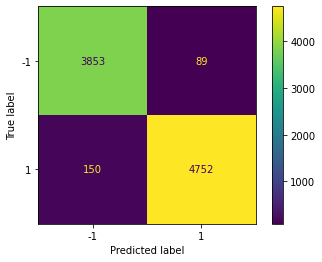

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model,X_train,y_train)

In [50]:
# getting scores from model from the test set
X_test = test_set.drop("Result", 1)
y_test = test_set["Result"].copy()

final_model_test_scores = get_model_scores(final_model,"Final K Nearest Neighbors" , X_test, y_test)
show_scores(final_model_test_scores)

model_name : Final K Nearest Neighbors
accuracy : 0.9461781999095432
precision : 0.914308176100629
recall : 0.9266932270916335
f1 : 0.9204590423426988
roc_auc_score : 0.9063382453449799


In [51]:
#saving the model
import pickle

model_name = 'phishing_site_detector.sav'
pickle.dump(final_model, open(model_name, 'wb'))

In [52]:
# saving the grid search results
grid_search_name = 'knn_grid_search.sav'
pickle.dump(grid_search, open(grid_search_name, 'wb'))



